In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/Volumes/T7 Shield/Projects_T7/Deep learning', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [6]:
data_dir

'/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos'

In [12]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos')

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [16]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

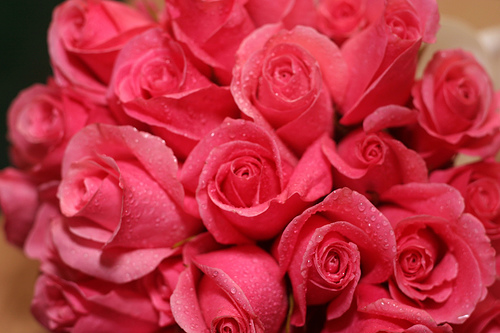

In [18]:
PIL.Image.open(str(roses[1]))

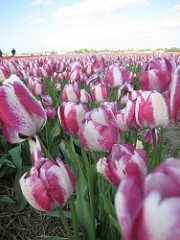

In [20]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [23]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [25]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [27]:
flowers_images_dict['roses'][:5]

[PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [29]:
str(flowers_images_dict['roses'][0])

'/Volumes/T7 Shield/Projects_T7/Deep learning/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [33]:
img.shape

(240, 178, 3)

In [35]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [37]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [38]:
X = np.array(X)
y = np.array(y)

Train test split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [45]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Build convolutional neural network and train it

In [48]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.3479 - loss: 1.4310
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.6155 - loss: 1.0008
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.6677 - loss: 0.7863
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.7856 - loss: 0.5724
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.8602 - loss: 0.3866
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.9297 - loss: 0.2097
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.9683 - loss: 0.1124
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.9886 - loss: 0.0466
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.9762 - loss: 0.0789
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.9937 - loss: 0.0308
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.9897 - loss: 0.0502
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13

In [50]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6260 - loss: 2.9600


[2.9651219844818115, 0.6296296119689941]

Here we see that while train accuracy is very high (100%), the test accuracy is significantly low (62.96%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [54]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


array([[  6.8356543 ,   4.207245  , -34.38435   , -15.256113  ,
         19.06683   ],
       [ 26.085005  ,  -4.5126057 , -34.416485  , -16.956728  ,
         14.142114  ],
       [  9.349615  , -11.94762   ,   4.7853427 , -18.080462  ,
          0.4248116 ],
       ...,
       [ -5.9935226 , -19.096655  ,  -5.5580664 ,  29.646854  ,
         11.277127  ],
       [  8.990499  ,   0.2973565 ,  -0.10927215, -15.585485  ,
         -2.1349916 ],
       [ -2.3643181 , -14.327695  ,  -5.6636095 ,  21.768585  ,
          7.4151692 ]], dtype=float32)

In [56]:
score = tf.nn.softmax(predictions[0])

In [58]:
np.argmax(score)

4

In [60]:
y_test[0]

1


Improve Test Accuracy Using Data Augmentation

In [69]:
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal", 
                          input_shape=(180, 
                                       180,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original Image

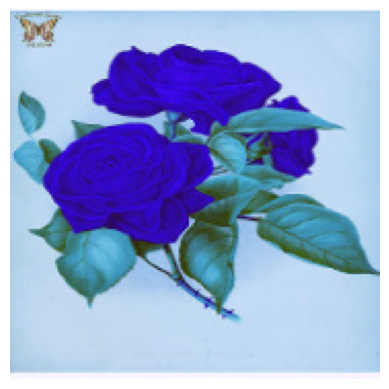

In [72]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

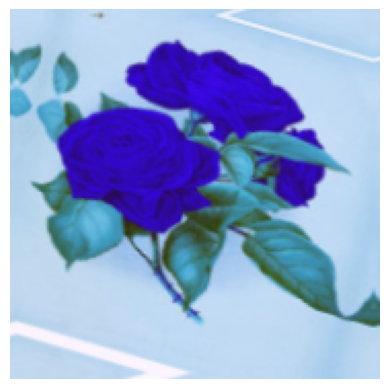

In [75]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [78]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.3729 - loss: 1.4743
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.5870 - loss: 1.0384
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.6323 - loss: 0.9239
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.6762 - loss: 0.8471
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.6913 - loss: 0.7761
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.7011 - loss: 0.7863
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.7220 - loss: 0.7096
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.7205 - loss: 0.6985
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.7361 - loss: 0.6753
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.7714 - loss: 0.6106
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.7611 - loss: 0.5945
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15

In [80]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7094 - loss: 1.1014


[1.1039296388626099, 0.7124183177947998]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 71.24%